## Use opencv to run sobel operators on a grayscale image

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

[[  0.  38. 292. ... 258.  28.   0.]
 [  0. 173. 365. ... 315. 143.   0.]
 [  0. 405. 356. ... 293. 346.   0.]
 ...
 [  0. 185. 191. ...  77. 234.   0.]
 [  0.  71. 169. ... 155. 207.   0.]
 [  0.   4. 112. ... 192. 166.   0.]]


Text(0.5,1,'Pixels have a value of 1 or 0 based on the strength of the x gradient. ')

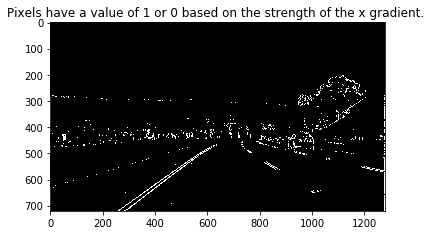

In [38]:
im = cv2.imread('curved-lane.jpg')

# mpimg uses RGB
# opencv uses BGR

def abs_sobel_thresh(img, orient='x', thresh=(0, 255) ):
    
    imgcopy = np.copy(img)
    gray = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2GRAY)
    
    assert orient== 'x' or orient=='y'
    
    sobel = None
    
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

    abs_sobel = np.absolute(sobel)
    print(abs_sobel)
    #convert to 8-bit 0..255 image
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    #numpy zeros_like --> Returns an array of zeros with the same shape and type as a given array.
    thresh_min = thresh[0]
    thresh_max = thresh[1]    
    
    #new image array with zeros
    sxbinary = np.zeros_like(scaled_sobel)
    
    #make anything with the inputted thresholds 1
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return sxbinary
sobeled_image = abs_sobel_thresh(im,'x',(20,100) )
plt.imshow(sxbinary, cmap='gray')
plt.title("Pixels have a value of 1 or 0 based on the strength of the x gradient. ")

Text(0.5,1,'Pixels have a value of 1 or 0 based on the strength of the x gradient. ')

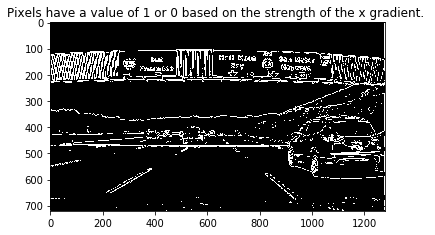

In [39]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    imgcopy = np.copy(img)
    
    gray = cv2.cvtColor(imgcopy, cv2.COLOR_RGB2GRAY)    
    
    sobel = None
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    sobelx,sobely = np.square(sobelx), np.square(sobely)
    abs_sobelxy = np.absolute(np.sqrt(sobelx + sobely) )
    
    #convert to 8-bit 0..255 image
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))

    thresh_min = mag_thresh[0]
    thresh_max = mag_thresh[1]    
    
    #new image array with zeros
    sxbinary = np.zeros_like(scaled_sobel)
    
    #make anything with the inputted thresholds 1
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return sxbinary

image_sobelxy = mpimg.imread("signs_vehicles_xygrad.png")
sobeled_image = mag_thresh(image_sobelxy, 3, (30, 100))
plt.imshow(sobeled_image, cmap='gray')
plt.title("Pixels have a value of 1 or 0 based on the strength of the x gradient. ")

In [40]:
def direction_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    imgcopy = np.copy(img)
    
    gray = cv2.cvtColor(imgcopy, cv2.COLOR_RGB2GRAY)    
    
    sobel = None
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    sobelx,sobely = np.absolute(sobelx), np.absolute(sobely)
    direction_of_gradient = np.arctan2( sobely, sobelx)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    
    thresh_min = thresh[0]
    thresh_max = thresh[1]    
    
    #new image array with zeros
    sxbinary = np.zeros_like(direction_of_gradient)
    
    #make anything with the inputted thresholds 1
    sxbinary[(direction_of_gradient >= thresh_min) & (direction_of_gradient <= thresh_max)] = 1
    
    return sxbinary

    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    

Text(0.5,1,'Direction of the Gradient')

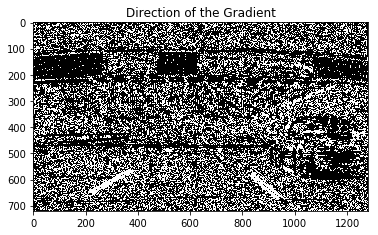

In [41]:
image_for_direction = mpimg.imread("signs_vehicles_xygrad.png")

#direction_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
sobeled_image = direction_threshold(image_for_direction, sobel_kernel=15, thresh=(0.7, 1.3))
plt.imshow(sobeled_image, cmap='gray')
plt.title("Direction of the Gradient")

### Group of function calls and binary operators to test various combinations of the image threshold manipulation

[[0.         0.93090177 0.35916078 ... 0.73422754 0.86842352 0.        ]
 [0.         0.79526651 0.28028232 ... 0.81103927 1.14960387 0.        ]
 [0.         0.50781953 0.12273723 ... 0.59445882 1.46590969 0.        ]
 ...
 [0.         0.36862755 0.08235303 ... 0.42352946 1.7960785  0.        ]
 [0.         0.72549027 0.08235294 ... 1.08235301 1.98823538 0.        ]
 [0.         0.91764712 0.20392162 ... 1.3960785  2.07843143 0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.50476086 0.3691256  0.15461189 ... 1.09089023 1.44888231 1.73006266]
 [0.434847   0.28303528 0.05255693 ... 0.44244325 0.70070997 0.6655845 ]
 ...
 [0.36862743 0.20392156 0.0039216  ... 0.10196079 0.54901969 0.65098053]
 [0.66666669 0.47450984 0.1607843  ... 0.38431381 0.78823534 0.87843138]
 [0.         0.         0.         ... 0.         0.         0.        ]]


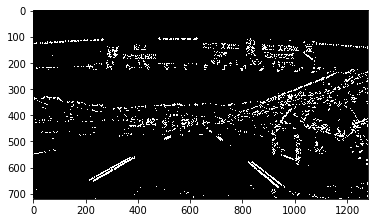

In [56]:
tester = mpimg.imread("signs_vehicles_xygrad.png")


dir_binary = direction_threshold(tester, sobel_kernel=15, thresh=(0.7, 1.3))
mag_binary = mag_thresh(tester, sobel_kernel=9, mag_thresh=(20, 100))
gradx = abs_sobel_thresh(tester, orient='x', thresh=(20,100))
grady = abs_sobel_thresh(tester, orient='y', thresh=(20,100))

combined = np.zeros_like(tester)
combined[ ((gradx == 1) & (grady == 1)) |((mag_binary == 1) & (dir_binary == 1))] = 1
plt.imshow(combined)

## Original Image vs. grayscaled image

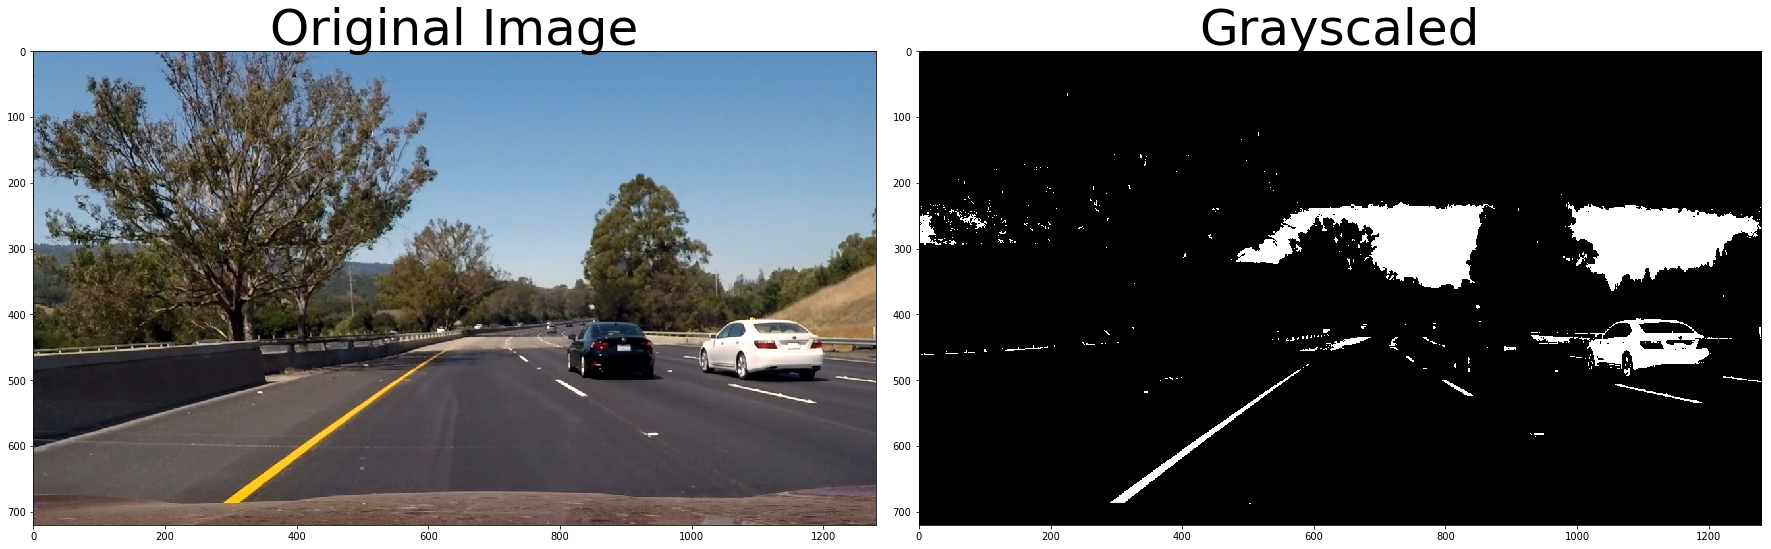

In [61]:
image = mpimg.imread('test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(binary,cmap='gray')
ax2.set_title('Grayscaled', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Comparing R-G-B color channels

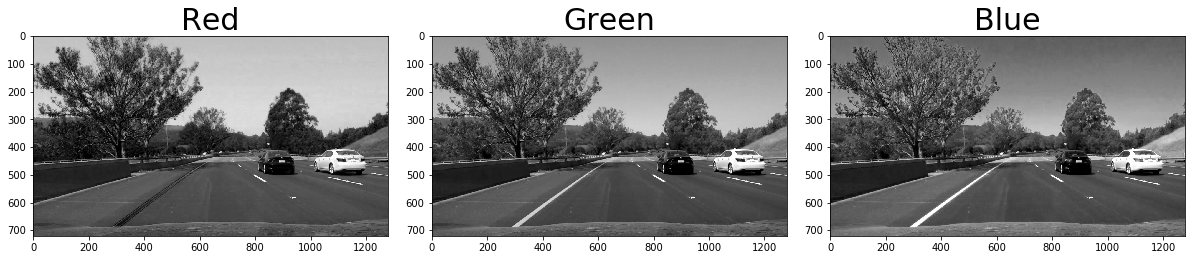

In [68]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
def display_three(R,G,B,t1,t2,t3):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
    f.tight_layout()
    ax1.imshow(R,cmap='gray')
    ax1.set_title(t1, fontsize=30)
    ax2.imshow(G,cmap='gray')
    ax2.set_title(t2, fontsize=30)
    ax3.imshow(B,cmap='gray')
    ax3.set_title(t3, fontsize=30)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
display_three(R,G,B,"Red",'Green','Blue')

Text(0.5,1,'Gray Binary')

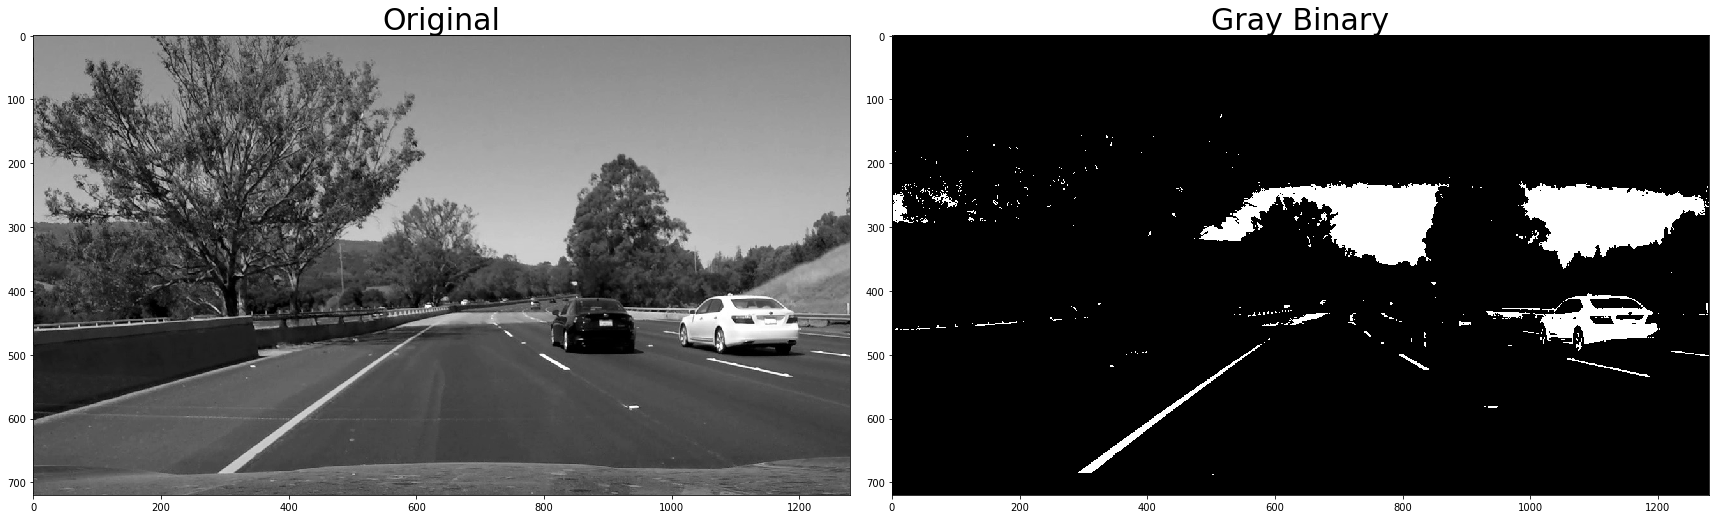

In [67]:
image = mpimg.imread('test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary2 = np.zeros_like(gray)
binary2[(gray > thresh[0]) & (gray <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
f.tight_layout()
ax1.imshow(gray,cmap='gray')
ax1.set_title('Original', fontsize=30)
ax2.imshow(binary2,cmap='gray')
ax2.set_title('Gray Binary', fontsize=30)

### HLC - Color

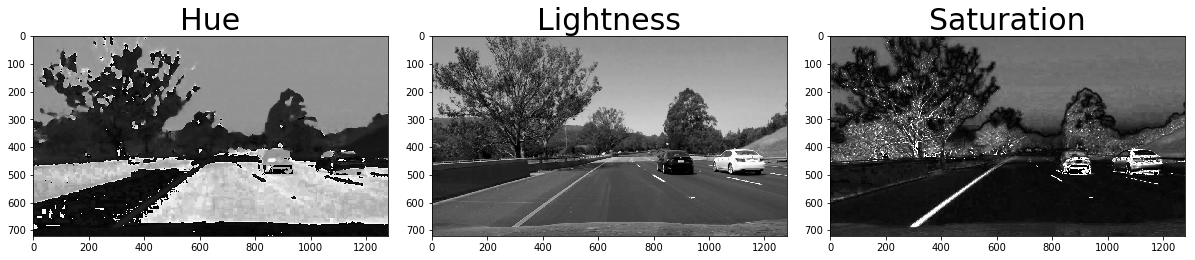

In [69]:
image_for_HLS = mpimg.imread('test6.jpg')

hls = cv2.cvtColor(image_for_HLS, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

display_three(H,L,S,"Hue",'Lightness','Saturation')

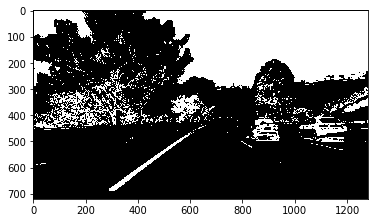

In [71]:
thresh = (90, 255)
binary_saturation = np.zeros_like(S)
binary_saturation[(S > thresh[0]) & (S <= thresh[1])] = 1
plt.imshow(binary_saturation,cmap='gray')